2024-10-02 09:48:01.216706: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-10-02 09:48:01.216726: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-10-02 09:48:01.216729: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-10-02 09:48:01.216742: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-10-02 09:48:01.216753: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


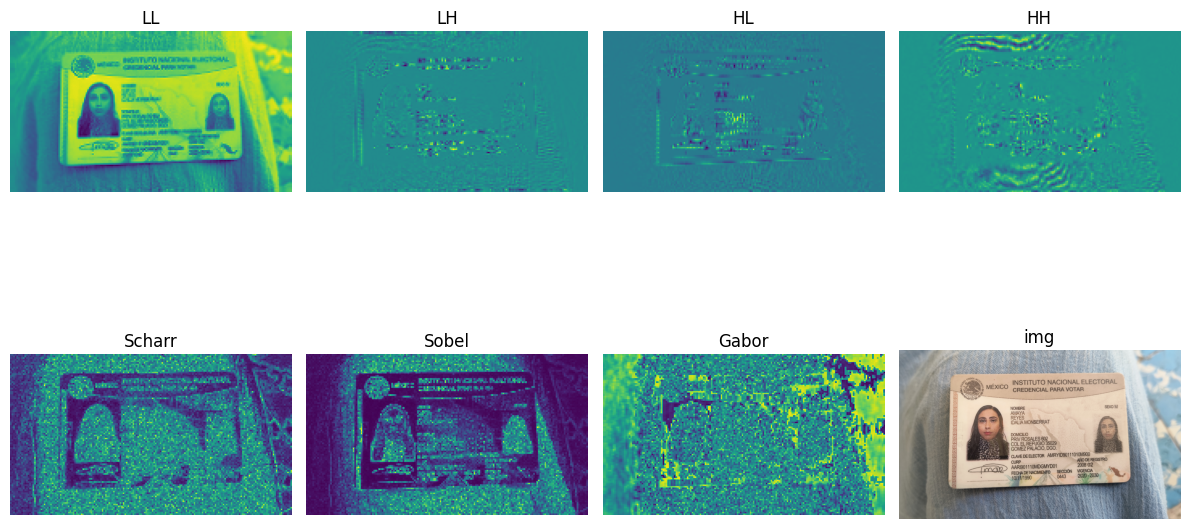

In [1]:
import os
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
from utils import preprocess_img


dataset_path_reales = "/Users/jorgecamero/MoireDataset/batchTrain/Reales"
imgFiles = [file for file in os.listdir(dataset_path_reales) if file.endswith(('.jpg', '.png', '.jpeg'))]
randomImgReales = os.path.join(dataset_path_reales, random.choice(imgFiles))

dataset_path_ataque = "/Users/jorgecamero/MoireDataset/batchTrain/Ataque"
imgFiles = [file for file in os.listdir(dataset_path_ataque) if file.endswith(('.jpg', '.png', '.jpeg'))]
randomImgAtaque = os.path.join(dataset_path_ataque, random.choice(imgFiles))

random_choice = random.choice([randomImgAtaque, randomImgReales])

HEIGHT = 800
WIDTH = 1400

img = cv2.imread(random_choice)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

channels = preprocess_img(img, HEIGHT, WIDTH)

LL = channels['LL_Input']
LH = channels['LH_Input']
HL = channels['HL_Input']
HH = channels['HH_Input']
Scharr = channels['Scharr_Input']
Sobel = channels['Sobel_Input']
Gabor = channels['Gabor_Input']
original = img

channel_list = [LL, LH, HL, HH, Scharr, Sobel, Gabor, img]
titles = ['LL', 'LH', 'HL', 'HH', 'Scharr', 'Sobel', 'Gabor', 'img']

n_channels = len(channel_list)
n_cols = 4
n_rows = (n_channels + n_cols - 1) // n_cols

fig, axs = plt.subplots(n_rows, n_cols, figsize=(12, 8))

axs = axs.flat if isinstance(axs, np.ndarray) else [axs]

for i, ax in enumerate(axs):
    if i < n_channels:
        ax.imshow(channel_list[i])
        ax.set_title(titles[i])
        ax.axis('off')
    else:
        fig.delaxes(ax)

plt.tight_layout()
plt.show()

In [2]:
import os

path = '/Users/jorgecamero/MOIRE-FRAUD-DETECTION'
print(os.path.exists(path))

for roots, dirs, files in os.walk(path):
    for file in files:
        if not file.endswith(('.jpg', '.png', '.jpeg', '.zip', '.txt', '.json', '.keras')):
            print(os.path.join(roots, file))
            #os.remove(os.path.join(roots, file))

True
/Users/jorgecamero/MOIRE-FRAUD-DETECTION/.DS_Store
/Users/jorgecamero/MOIRE-FRAUD-DETECTION/modelCallbacks.py
/Users/jorgecamero/MOIRE-FRAUD-DETECTION/predict.py
/Users/jorgecamero/MOIRE-FRAUD-DETECTION/CNN.py
/Users/jorgecamero/MOIRE-FRAUD-DETECTION/playground.ipynb
/Users/jorgecamero/MOIRE-FRAUD-DETECTION/.gitignore
/Users/jorgecamero/MOIRE-FRAUD-DETECTION/utils.py
/Users/jorgecamero/MOIRE-FRAUD-DETECTION/.gitattributes
/Users/jorgecamero/MOIRE-FRAUD-DETECTION/train.py
/Users/jorgecamero/MOIRE-FRAUD-DETECTION/compare_json.py
/Users/jorgecamero/MOIRE-FRAUD-DETECTION/read_json.py
/Users/jorgecamero/MOIRE-FRAUD-DETECTION/__pycache__/CNN.cpython-39.pyc
/Users/jorgecamero/MOIRE-FRAUD-DETECTION/__pycache__/train.cpython-39.pyc
/Users/jorgecamero/MOIRE-FRAUD-DETECTION/__pycache__/utils.cpython-39.pyc
/Users/jorgecamero/MOIRE-FRAUD-DETECTION/__pycache__/read_json.cpython-39.pyc
/Users/jorgecamero/MOIRE-FRAUD-DETECTION/__pycache__/predict.cpython-39.pyc
/Users/jorgecamero/MOIRE-FRAUD-DET

In [3]:
from utils import get_model

model_path = '/Users/jorgecamero/Moire-Fraud-Detection/checkpoint/best_model.keras'
model = get_model(loadFlag=True, path=model_path)


/Users/jorgecamero/.pyenv/versions/3.9.7/lib/python3.9/site-packages/keras/src/trainers/trainer.py:210: UserWarning: Model doesn't support `jit_compile=True`. Proceeding with `jit_compile=False`.
  warnings.warn(


Prediccion: Real


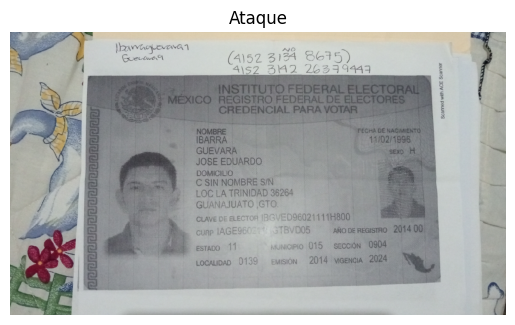

In [45]:
from utils import load_img, preprocess_img
from predict import predict_img

import os
import random
import matplotlib.pyplot as plt

paths = ['/Users/jorgecamero/MoireDataset/batchTrain/Ataque', '/Users/jorgecamero/MoireDataset/batchTrain/Reales']
path = random.choice(paths)
path = paths[0]
img_list = [img for img in os.listdir(path) if img.lower().endswith(('.jpg', '.png', '.jpeg'))]
img_path = os.path.join(path, random.choice(img_list))

img_path = 'pass_img/300_6_front_large.jpg'

img = load_img(img_path)
img_elements = preprocess_img(img)

predict = predict_img(model=model, img=img_elements)
predict_label = 'Real' if predict == 0 else 'Ataque'
print('Prediccion:', predict_label)

plt.imshow(img)
plt.title(os.path.basename(path))
plt.axis('off')
plt.show()

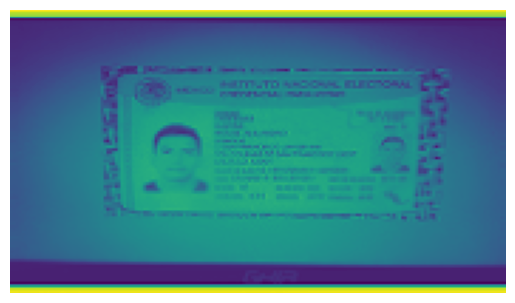

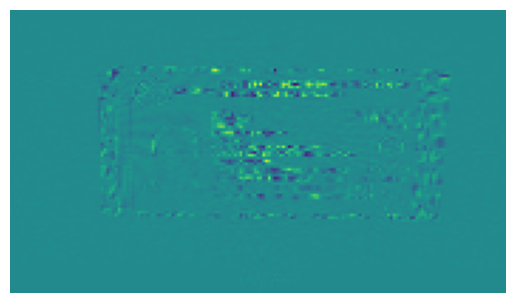

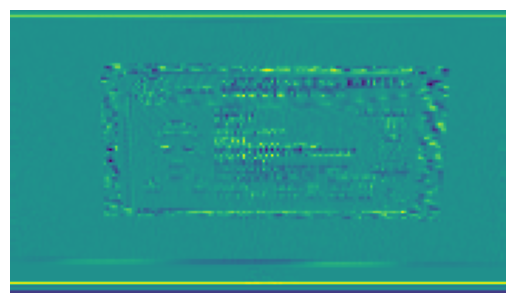

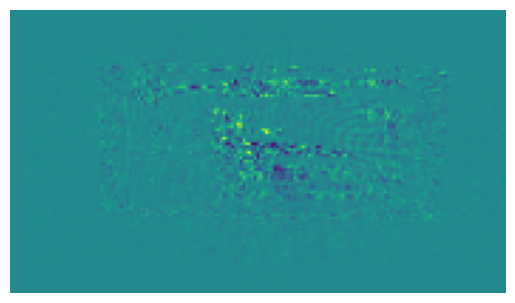

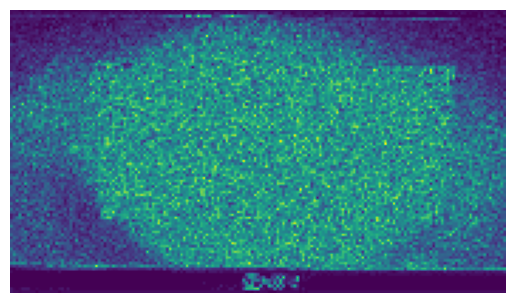

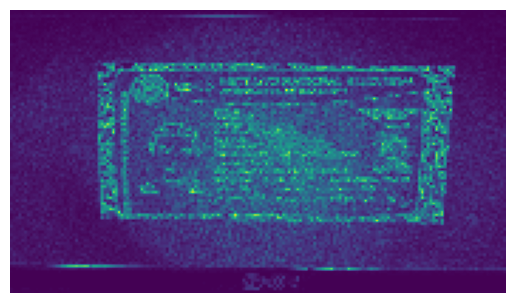

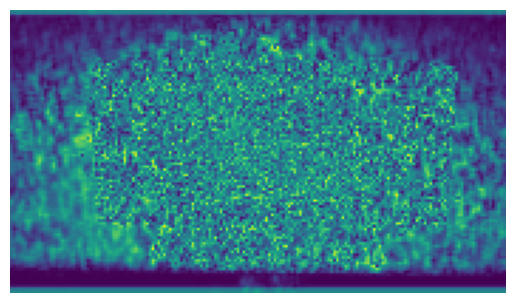

In [264]:
for name, element in img_elements.items():
    plt.imshow(element)
    plt.axis('off')
    plt.show()

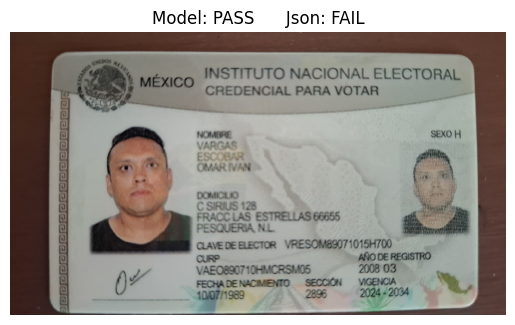

KeyboardInterrupt: 

In [32]:
import os
import cv2
import matplotlib.pyplot as plt
from IPython.display import clear_output

from utils import get_model
from predict import predict_img
from read_json import get_scores
from utils import load_img, preprocess_img

HEIGHT = 800
WIDTH = 1400
model_path = '/Users/jorgecamero/Moire-Fraud-Detection/checkpoint/best_model.keras'
model = get_model(loadFlag=True, path=model_path)

root = '/Users/jorgecamero/MoireDataset/id_android_download/id_android_301'

folder_list = [folder for folder in os.listdir(root) if os.path.isdir(os.path.join(root, folder))]
for folder in folder_list:
    folder_path = os.path.join(root, folder)
    img_list = [img for img in os.listdir(folder_path) if img.lower().endswith(('.jpg', '.png', '.jpeg'))]
    json_list = [file for file in os.listdir(folder_path) if file.lower().endswith('.json')]
    
    for json, img in zip(json_list, img_list):
        json_path = os.path.join(folder_path, json)
        img_path = os.path.join(folder_path, img)
        
        img_format = load_img(img_path, height=HEIGHT, width=WIDTH)
        img_elements = preprocess_img(img_format)
        prediction = 'PASS' if predict_img(model, img_elements) == 0 else 'FAIL'
        
        json_prediction = get_scores(json_path)['result_result'][0]
        if json_prediction == 'WARNING':
            json_prediction = 'PASS'

        if json_prediction != prediction:
            plt.imshow(img_format)
            plt.axis('off')
            plt.title(f"Model: {prediction}      Json: {json_prediction}")
            plt.pause(2)
            clear_output(wait=True)

In [34]:
file = '/Users/jorgecamero/MoireDataset/id_android_download/id_android_301_pass_list.txt'
with open(file, 'r') as text_file:
        lines = [line.strip() for line in text_file]
    
print(lines)

['/Users/jorgecamero/MoireDataset/id_android_download/id_android_301/bi1723653325.3711817/2_front_large.jpg', '/Users/jorgecamero/MoireDataset/id_android_download/id_android_301/bi1723653325.3711817/1_front_large.jpg', '/Users/jorgecamero/MoireDataset/id_android_download/id_android_301/bi1723602798.9857965/3_front_large.jpg', '/Users/jorgecamero/MoireDataset/id_android_download/id_android_301/bi1723587831.8068116/8_front_large.jpg', '/Users/jorgecamero/MoireDataset/id_android_download/id_android_301/bi1723672795.3381646/2_front_large.jpg', '/Users/jorgecamero/MoireDataset/id_android_download/id_android_301/bi1723672795.3381646/1_front_large.jpg', '/Users/jorgecamero/MoireDataset/id_android_download/id_android_301/bi1723659197.8776512/3_front_large.jpg', '/Users/jorgecamero/MoireDataset/id_android_download/id_android_301/bi1723659197.8776512/1_front_large.jpg', '/Users/jorgecamero/MoireDataset/id_android_download/id_android_301/bi1723587617.1059167/3_front_large.jpg', '/Users/jorgecamer

In [43]:
import os
import shutil
import matplotlib.pyplot as plt
from IPython.display import clear_output

from utils import load_img

outputDir = './pass_img'
if not os.path.exists(outputDir):
    os.mkdir(outputDir)

for idx, filename in enumerate(lines):
    print(idx)
    new_filename = os.path.join(outputDir, f'{idx}_{os.path.basename(filename)}')
    print(new_filename)
    shutil.copyfile(filename, new_filename)
    # img = load_img(filename, height=HEIGHT, width=WIDTH)
    # plt.imshow(img)
    # plt.axis('off')
    # print(filename)
    # plt.pause(2)
    # clear_output(wait=True)

0
./pass_img/0_2_front_large.jpg
1
./pass_img/1_1_front_large.jpg
2
./pass_img/2_3_front_large.jpg
3
./pass_img/3_8_front_large.jpg
4
./pass_img/4_2_front_large.jpg
5
./pass_img/5_1_front_large.jpg
6
./pass_img/6_3_front_large.jpg
7
./pass_img/7_1_front_large.jpg
8
./pass_img/8_3_front_large.jpg
9
./pass_img/9_3_front_large.jpg
10
./pass_img/10_1_front_large.jpg
11
./pass_img/11_1_front_large.jpg
12
./pass_img/12_3_front_large.jpg
13
./pass_img/13_1_front_large.jpg
14
./pass_img/14_1_front_large.jpg
15
./pass_img/15_2_front_large.jpg
16
./pass_img/16_1_front_large.jpg
17
./pass_img/17_3_front_large.jpg
18
./pass_img/18_9_front_large.jpg
19
./pass_img/19_1_front_large.jpg
20
./pass_img/20_2_front_large.jpg
21
./pass_img/21_1_front_large.jpg
22
./pass_img/22_2_front_large.jpg
23
./pass_img/23_5_front_large.jpg
24
./pass_img/24_1_front_large.jpg
25
./pass_img/25_7_front_large.jpg
26
./pass_img/26_1_front_large.jpg
27
./pass_img/27_2_front_large.jpg
28
./pass_img/28_1_front_large.jpg
29
./